# Primary - Neural Network

In [5]:
%run preprocessing_lean.ipynb
%run visuals.ipynb

In [9]:
SEED = 42
NN_BATCH_SIZE = 64
NN_EPOCHS = 100

2025-05-07 19:23:57.207844: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


125/612 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9713 - loss: 0.0875

2025-05-07 19:26:56.798503: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9723 - loss: 0.0897


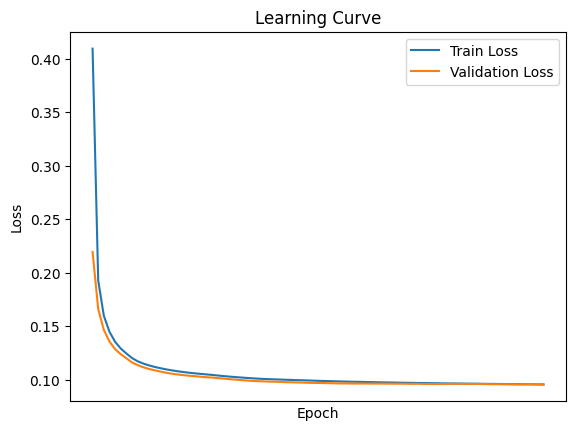

In [11]:
'''
Model A: Neural Network
Training Step

P.S. This section is commented out to make running this notebook faster.
'''

# import os
# from tensorflow.random import set_seed
# from tensorflow import get_logger

# os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# get_logger().setLevel('ERROR')

# np.random.seed(SEED)
# set_seed(SEED)

# from tensorflow.keras.activations import relu, softmax, tanh
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy

# import matplotlib.pyplot as plt


# model = Sequential([
#     Input(shape=(6,)),
#     Dense(16, activation=relu),
#     Dense(8, activation=relu),
#     Dense(3, activation=softmax)
# ])

# model.compile(optimizer=Adam(),
#               loss=SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# history = model.fit(X_trn, y_trn,
#                     epochs=NN_EPOCHS,
#                     batch_size=NN_BATCH_SIZE,
#                     validation_data=(X_val, y_val),
#                     callbacks=[early_stopping],
#                     verbose=0)

# test_loss, test_accuracy = model.evaluate(X_tst, y_tst, verbose=1)

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.xticks([])
# plt.title('Learning Curve')
# plt.show()

# model.save_weights("nn.weights.h5")

 219/1958 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step

2025-05-07 19:28:42.859347: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


1958/1958 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step
490/490 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


,Dataset,Accuracy
0,Training,0.971793
1,Validation,0.971843
2,Test,0.972876


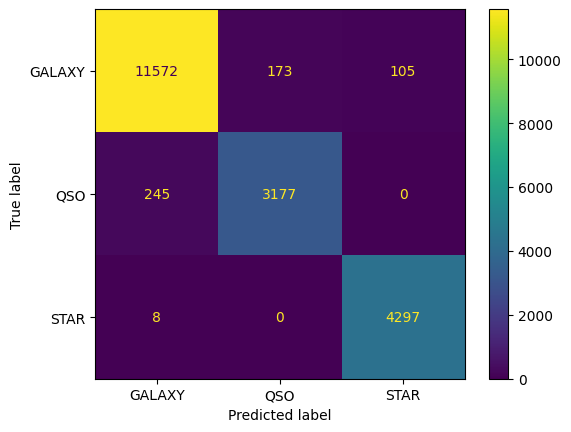

In [12]:
'''
This section uses weights produced from the more expensive training step in the cell above.
It also nominally uses author-selected hyperparameters due to the time demands of doing
a hyperparameter search for the architecture.
'''

import os
from tensorflow.random import set_seed

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
np.random.seed(SEED)
set_seed(SEED)

from tensorflow.keras.activations import relu, softmax, tanh
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


model = Sequential([
    Input(shape=(6,)),
    Dense(16, activation=relu),
    Dense(8, activation=relu),
    Dense(3, activation=softmax)
])

model.load_weights("nn.weights.h5")
generate_statistics(model.predict, single_output=False)